In [210]:
import pandas as pd
import numpy as np

In [ ]:
# uploading data file
from google.colab import files
uploader = files.upload()

Saving uber_data.csv to uber_data.csv


In [211]:
# reading csv data file
data = pd.read_csv(r"/content/uber_data.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [212]:
data['trip_id'] = data.index

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [214]:
# type conversions
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [215]:
data['tpep_dropoff_datetime']

,tpep_dropoff_datetime
0,2016-03-01 00:07:55
1,2016-03-01 00:11:06
2,2016-03-01 00:31:06
3,2016-03-01 00:00:00
4,2016-03-01 00:00:00
...,...
99995,2016-03-01 06:22:15
99996,2016-03-01 06:32:41
99997,2016-03-01 06:37:23
99998,2016-03-01 06:22:09


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [217]:
# checking duplicates
ans = int(data.duplicated().sum())
ans

0

# Data Transformation and Modeling Done Together

In [218]:
# datetime_dim
datetime_dim = data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]

datetime_dim['pickup_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pickup_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pickup_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday
datetime_dim['pickup_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pickup_year'] = datetime_dim['tpep_pickup_datetime'].dt.year

datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year

datetime_dim['datetime_id'] = datetime_dim.index+1

/tmp/ipython-input-2607135642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['pickup_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
/tmp/ipython-input-2607135642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['pickup_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
/tmp/ipython-input-2607135642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [219]:
datetime_dim.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour',
       'pickup_day', 'pickup_weekday', 'pickup_month', 'pickup_year',
       'drop_hour', 'drop_day', 'drop_weekday', 'drop_month', 'drop_year',
       'datetime_id'],
      dtype='object')

In [220]:
# pickup_location_dim table
pickup_location_dim = data[['pickup_latitude', 'pickup_longitude']]

pickup_location_dim = pickup_location_dim.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='count')

pickup_location_dim['pickup_location_id'] = pickup_location_dim.index+1
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]
pickup_location_dim

,pickup_location_id,pickup_latitude,pickup_longitude
0,1,0.000000,0.000000
1,2,37.389389,-121.933250
2,3,37.389416,-121.933151
3,4,37.389473,-121.933327
4,5,40.544029,-74.489723
...,...,...,...
98050,98051,41.002087,-74.110451
98051,98052,41.034771,-74.073082
98052,98053,41.051239,-73.534912
98053,98054,41.059826,-73.832832


In [221]:
# dropoff_location dimension table
dropoff_location_dim = data[['dropoff_longitude', 'dropoff_latitude']]
dropoff_location_dim = dropoff_location_dim.groupby(['dropoff_longitude', 'dropoff_latitude']).size().reset_index(name='count')
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index+1
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id', 'dropoff_latitude', 'dropoff_longitude']]
dropoff_location_dim

# dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
# dropoff_location_dim = dropoff_location_dim[['dropoff_location_id', 'dropoff_latitude', 'dropoff_longitude']]


,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,1,37.389488,-121.933327
1,2,37.389328,-121.933296
2,3,37.389378,-121.933243
3,4,40.609261,-74.651306
4,5,40.389938,-74.641724
...,...,...,...
98412,98413,40.685276,-73.478363
98413,98414,40.770088,-73.421928
98414,98415,40.708599,-73.199928
98415,98416,40.810081,-73.166054


In [222]:
# payment_type dim table
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

payment_type_id = data['payment_type'].dropna().unique()

payment_type_dim = pd.DataFrame({
    'payment_type_id': payment_type_id,
})

payment_type_dim['payment_type_name'] = payment_type_dim['payment_type_id'].map(payment_type_name)
payment_type_dim


,payment_type_id,payment_type_name
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute


In [223]:
# rate_code dim table
rate_code_type = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride"
}

rate_code_ids = data['RatecodeID'].dropna().unique()

rate_code_dim = pd.DataFrame({'RatecodeID': rate_code_ids})
rate_code_dim['rate_code_type'] = rate_code_dim['RatecodeID'].map(rate_code_type)

rate_code_dim.sort_values(by='RatecodeID', inplace=True)
rate_code_dim.reset_index(drop=True, inplace=True)
rate_code_dim


,RatecodeID,rate_code_type
0,1,Standard rate
1,2,JFK
2,3,Newark
3,4,Nassau or Westchester
4,5,Negotiated fare
5,6,Group ride


In [224]:
# passenger_count dim table
passenger_count_dim = data['passenger_count'].dropna().unique()
passenger_count_dim = pd.DataFrame({'passenger_count': passenger_count_dim}).sort_values(by='passenger_count').reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index+1
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

# trip_distance dim table
trip_distance_dim = data['trip_distance'].dropna().unique()
trip_distance_dim = pd.DataFrame({'trip_distance': trip_distance_dim}).sort_values(by='trip_distance').reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index+1
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]
# trip_distance_dim
passenger_count_dim


,passenger_count_id,passenger_count
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5
6,7,6


In [225]:
fact_table = data.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count') \
    .merge(trip_distance_dim, left_on='trip_distance', right_on='trip_distance') \
    .merge(rate_code_dim, left_on='RatecodeID', right_on='RatecodeID') \
    .merge(pickup_location_dim, left_on=['pickup_latitude', 'pickup_longitude'], right_on=['pickup_latitude', 'pickup_longitude']) \
    .merge(dropoff_location_dim, left_on=['dropoff_latitude', 'dropoff_longitude'], right_on=['dropoff_latitude', 'dropoff_longitude']) \
    .merge(datetime_dim, on=['tpep_pickup_datetime', 'tpep_dropoff_datetime']) \
    .merge(payment_type_dim, left_on='payment_type', right_on='payment_type_id') \
    [[
        'trip_id', 'VendorID', 'datetime_id', 'passenger_count_id',
        'trip_distance_id', 'RatecodeID', 'store_and_fwd_flag',
        'pickup_location_id', 'dropoff_location_id', 'payment_type_id',
        'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
        'improvement_surcharge', 'total_amount'
    ]]

fact_table


,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,RatecodeID,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,1,1,251,1,N,67731,9076,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,2,2,291,1,N,71701,7108,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,3,3,1962,1,N,794,58239,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,4,4,1079,1,N,74592,66968,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,3,2,5,4,1079,1,N,74592,66968,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
5,3,2,6,4,1079,1,N,74592,66968,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
6,3,2,7,4,1079,1,N,74592,66968,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
7,4,2,4,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
8,4,2,5,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
9,4,2,6,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [226]:
# List all variables in memory
%who DataFrame


data	 datetime_dim	 df	 df_day_fare	 df_payment	 dim	 dropoff_location_dim	 fact_table	 new_fact_table	 
passenger_count_dim	 payment_type_dim	 pickup_location_dim	 rate_code_dim	 result	 trip_distance_dim	 


# Data Loading

In [227]:
# pip install duckdb


In [228]:
import duckdb

In [240]:
con = duckdb.connect("uber_etl.duckdb")  # or use ":memory:" for in-memory

In [239]:
# import os
# os.remove("uber_etl.duckdb")  # or whatever your database filename is

FileNotFoundError: [Errno 2] No such file or directory: 'uber_etl.duckdb'

In [241]:
con.register("fact_df", fact_table)  # register DataFrame as a DuckDB table
con.execute("CREATE TABLE fact_table AS SELECT * FROM fact_df")

In [257]:
# checking the result
result = con.execute("SELECT * FROM fact_table LIMIT 5").fetchdf()
result


,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,RatecodeID,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,1,1,251,1,N,67731,9076,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,2,2,291,1,N,71701,7108,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,3,3,1962,1,N,794,58239,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,4,4,1079,1,N,74592,66968,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,3,2,5,4,1079,1,N,74592,66968,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62


In [258]:
# our dataFrames
dfs = {
    "passenger_count_dim": passenger_count_dim,
    "trip_distance_dim": trip_distance_dim,
    "rate_code_dim": rate_code_dim,
    "pickup_location_dim": pickup_location_dim,
    "dropoff_location_dim": dropoff_location_dim,
    "datetime_dim": datetime_dim,
    "payment_type_dim": payment_type_dim
}


# # Check object type and drop if it's a table
# for table_name in dfs.keys():
#     result = con.execute(f"""
#         SELECT table_type FROM information_schema.tables
#         WHERE table_name = '{table_name}'
#     """).fetchone()

#     if result and result[0] == 'BASE TABLE':
#         con.execute(f"DROP TABLE IF EXISTS {table_name}")
#         print(f"Dropped table: {table_name}")
#     else:
#         print(f"{table_name} is not a base table or does not exist.")


# Register and create tables in DuckDB
for table_name, dim in dfs.items():
    con.register(f"{table_name}_df", dim)  # Temporary name in DuckDB
    con.execute(f"CREATE TABLE {table_name} AS SELECT * FROM {table_name}_df")


In [259]:
# con.execute("SHOW TABLES").fetchdf()


In [260]:
# # Get all tables
# tables = con.execute("SHOW TABLES").fetchdf()

# # Filter out 'fact_table'
# tables_to_drop = tables[ (tables['name'] != 'fact_table' ) & (tables['name'] != 'fact_df' ) & (tables['name']!='passenger_count_dim_df')  ]['name'].tolist()

# # Drop the rest
# for table in tables_to_drop:
#     con.execute(f"DROP TABLE IF EXISTS {table}")


In [261]:
## checks the duckdb views
# con.execute("SELECT table_name FROM information_schema.views").fetchdf()

# # drop the views
# con.execute("DROP VIEW IF EXISTS fact_df")
# con.execute("DROP VIEW IF EXISTS passenger_count_dim_df")

# Data Analysis using SQL Queries

In [262]:
result = con.execute('Select * from payment_type_dim limit 4').fetch_df()
result

,payment_type_id,payment_type_name
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute


In [263]:
# trips by passengers count
con.execute("""
    SELECT pc.passenger_count, COUNT(*) AS trip_count
    FROM fact_table ft
    JOIN passenger_count_dim pc ON ft.passenger_count_id = pc.passenger_count_id
    GROUP BY pc.passenger_count
    ORDER BY trip_count DESC
""").fetchdf()


,passenger_count,trip_count
0,3,4
1,4,4
2,5,4
3,6,4
4,0,1
5,1,1
6,2,1


In [264]:
# top-5 highest fare trips
con.execute("""
    SELECT * FROM fact_table
    ORDER BY fare_amount DESC
    LIMIT 5
""").fetchdf()


,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,RatecodeID,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,4,2,4,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.0,15.5,0.3,113.8
1,4,2,5,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.0,15.5,0.3,113.8
2,4,2,6,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.0,15.5,0.3,113.8
3,4,2,7,5,2267,3,N,93946,202,1,98.0,0.0,0.0,0.0,15.5,0.3,113.8
4,2,2,3,3,1962,1,N,794,58239,1,54.5,0.5,0.5,8.0,0.0,0.3,63.8


In [265]:
# average trip distance by rate code
con.execute("""
    SELECT rc.rate_code_type, AVG(td.trip_distance) AS avg_distance
    FROM fact_table ft
    JOIN rate_code_dim rc ON ft.RatecodeId = rc.RatecodeId
    JOIN trip_distance_dim td ON ft.trip_distance_id = td.trip_distance_id
    GROUP BY rc.rate_code_type
""").fetchdf()



,rate_code_type,avg_distance
0,Standard rate,7.670667
1,Newark,30.430000


In [266]:
# trips per day
con.execute("""
    SELECT d.pickup_day, COUNT(*) AS trips
    FROM fact_table ft
    JOIN datetime_dim d ON ft.datetime_id = d.datetime_id
    GROUP BY d.pickup_day
    ORDER BY d.pickup_day
""").fetchdf()


,pickup_day,trips
0,1,19


In [267]:
# fetching all payment_types ordered by payment_type
con.execute("""
  select * from payment_type_dim p order by payment_type_name;
""").fetch_df()


,payment_type_id,payment_type_name
0,2,Cash
1,1,Credit card
2,4,Dispute
3,3,No charge


# Some Aggregations using SQL

In [268]:
# total revenue by payment type
con.execute("""
    SELECT pt.payment_type_name, SUM(ft.total_amount) AS total_revenue
    FROM fact_table ft
    JOIN payment_type_dim pt ON ft.payment_type_id = pt.payment_type_id
    GROUP BY pt.payment_type_name
    ORDER BY total_revenue DESC
""").fetchdf()


,payment_type_name,total_revenue
0,Credit card,834.62
1,Cash,97.20


In [269]:
# average tip per passenger count
con.execute("""
    SELECT pc.passenger_count, ROUND(AVG(ft.tip_amount), 2) AS avg_tip
    FROM fact_table ft
    JOIN passenger_count_dim pc ON ft.passenger_count_id = pc.passenger_count_id
    GROUP BY pc.passenger_count
    ORDER BY pc.passenger_count
""").fetchdf()


,passenger_count,avg_tip
0,0,2.05
1,1,3.05
2,2,8.00
3,3,3.78
4,4,0.00
5,5,5.06
6,6,0.00


In [270]:
# total bills paid by rate code
con.execute("""
    SELECT rc.RatecodeId, SUM(ft.tolls_amount) AS total_tolls
    FROM fact_table ft
    JOIN rate_code_dim rc ON ft.RatecodeId = rc.RatecodeId
    GROUP BY rc.RatecodeId
    ORDER BY total_tolls DESC
""").fetchdf()


,RatecodeID,total_tolls
0,3,62.00
1,1,22.16


In [271]:
# average fare by day of week
con.execute("""
    SELECT d.pickup_weekday, ROUND(AVG(ft.fare_amount), 2) AS avg_fare
    FROM fact_table ft
    JOIN datetime_dim d ON ft.datetime_id = d.datetime_id
    GROUP BY d.pickup_weekday
    ORDER BY d.pickup_weekday
""").fetch_df()


,pickup_weekday,avg_fare
0,1,40.97


In [272]:
datetime_dim.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour',
       'pickup_day', 'pickup_weekday', 'pickup_month', 'pickup_year',
       'drop_hour', 'drop_day', 'drop_weekday', 'drop_month', 'drop_year',
       'datetime_id'],
      dtype='object')

# Data Visualizations

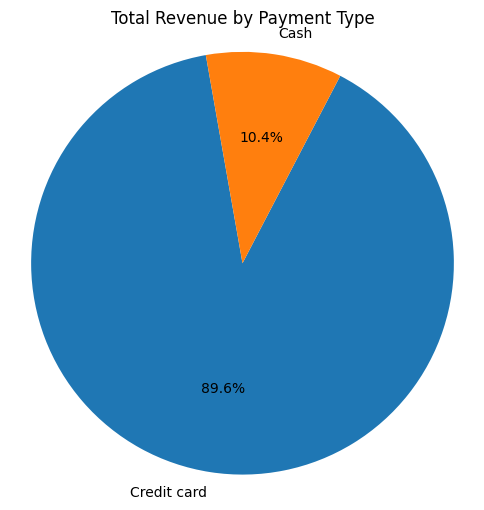

In [273]:
# Total Revenue by Payment Type (Pie Chart)
import matplotlib.pyplot as plt

df_payment = con.execute("""
    SELECT pt.payment_type_name, SUM(ft.total_amount) AS total_revenue
    FROM fact_table ft
    JOIN payment_type_dim pt ON ft.payment_type_id = pt.payment_type_id
    GROUP BY pt.payment_type_name
""").fetchdf()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(df_payment['total_revenue'], labels=df_payment['payment_type_name'], autopct='%1.1f%%', startangle=100)
plt.title("Total Revenue by Payment Type")
plt.axis('equal')
plt.show()


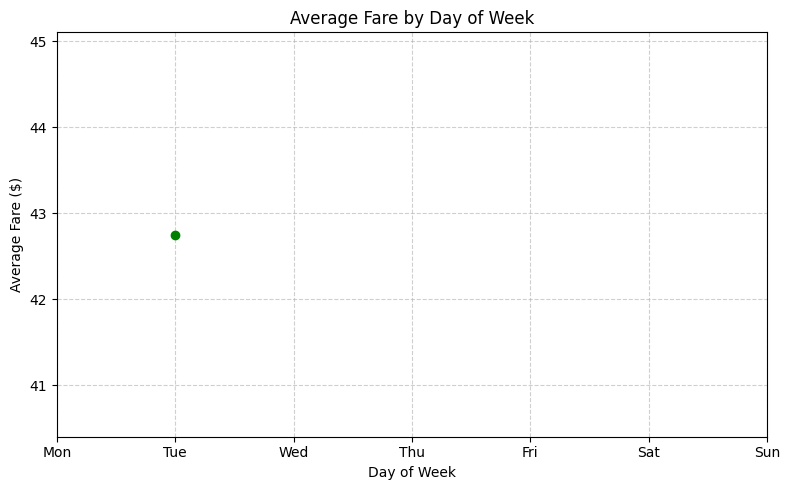

In [274]:
# Average Fare by Day of Week (Line Plot)
df_day_fare = con.execute("""
    SELECT d.pickup_weekday, ROUND(AVG(ft.fare_amount), 2) AS avg_fare
    FROM fact_table ft
    JOIN datetime_dim d ON ft.trip_id = d.datetime_id
    GROUP BY d.pickup_weekday
    ORDER BY d.pickup_weekday
""").fetchdf()

# Ensure weekday labels are readable (e.g., 0 = Monday, 6 = Sunday)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_day_fare['pickup_weekday'], df_day_fare['avg_fare'], marker='o', color='green')
plt.title("Average Fare by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Fare ($)")
plt.xticks(ticks=range(7), labels=weekday_labels)  # optional: replace with actual labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [275]:
datetime_dim.pickup_weekday.unique()

array([1, 3], dtype=int32)

### ETL Process Using Uber Dataset
We performed a complete **ETL** exercise on a real Uber dataset, following a structured data engineering workflow:

1. **Extract** – Loaded the raw data from a CSV file (source system).

2. **Transform** – Cleaned the data, created relevant columns, and built proper data models (fact and dimension tables).

3. **Load** – Stored the transformed data into a *DuckDB* database, acting as our central *data warehouse*.

After that, we executed *SQL queries directly on the DuckDB tables* using Python APIs for analytical processing.

Finally, we performed *data aggregations and visualizations — demonstrating the post-ETL analysis phase*.



In [277]:
con.execute("""
  SELECT d.pickup_weekday, COUNT(ft.fare_amount) AS total_trips,
       ROUND(AVG(ft.fare_amount), 2) AS avg_fare
FROM fact_table ft
JOIN datetime_dim d ON ft.trip_id == d.datetime_id
GROUP BY d.pickup_weekday
ORDER BY d.pickup_weekday;

""").fetch_df()

,pickup_weekday,total_trips,avg_fare
0,1,18,42.75


In [282]:
datetime_dim.pickup_weekday.value_counts()

,count
pickup_weekday,
3,76780
1,23220


In [280]:
# transactions entries with weekday as 3
con.execute("""
  SELECT ft.*
FROM fact_table ft
JOIN datetime_dim d ON ft.datetime_id = d.datetime_id
WHERE d.pickup_weekday = 3;
""").fetchdf()

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,RatecodeID,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
